In [1]:
import torch
import torchaudio
from torchaudio import transforms as T
from torchaudio import functional as AF
from transforms import *
import sys
sys.path.insert(0, '../')
from utils.visualize import play_audio, plot_spectrogram

In [2]:
audio_path = '../assests/test.wav'
noise_path = '../assests/noises/voices.wav'

sample_rate = 32000
audio_length = 5   # 5s
audio, sr = torchaudio.load(audio_path)
noise, sr1 = torchaudio.load(noise_path)

if sr != sample_rate: audio = AF.resample(audio, sr, sample_rate)
if audio.shape[0] != 1: audio = audio[:1]
if audio.shape[1]!= sample_rate*audio_length: audio = audio[:, :sample_rate*audio_length]
if sr1 != sample_rate: noise = AF.resample(noise, sr1, sample_rate)

In [3]:
play_audio(audio, sample_rate)
play_audio(noise, sample_rate)

## WaveForm Augmentations

In [4]:
## Background Noise
background_noise = BackgroundNoise(3) #20(weak)~3(strong)
noise_audio = background_noise(audio, noise)
play_audio(noise_audio, sample_rate)

In [5]:
# Fade In/Out
fade = Fade(0.1) # 0.1(10% of audio)~0.5(50% of audio)
fade_audio = fade(audio)
play_audio(fade_audio, sample_rate)

In [6]:
# Add Volume
volume = Volume(20) # 3(weak)~20(strong)
vol_audio = volume(audio)
play_audio(vol_audio, sample_rate)

In [7]:
# Gaussian Noise
gnoise = GaussianNoise(0.005) # 0.005(weak)~0.02(strong)
gnoise_audio = gnoise(audio)
play_audio(gnoise_audio, sample_rate)

## Spectrogram Augmentations

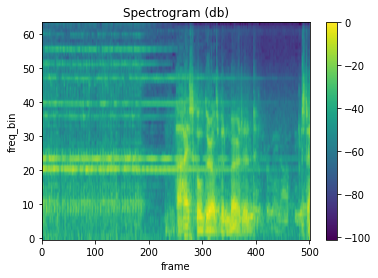

(torch.Size([1, 64, 501]), tensor(6.4630e-09), tensor(84.9779))

In [4]:
sample_rate = 32000
win_length = 1024
hop_length = 320
n_mels = 64
fmin = 50
fmax = 14000
audio_length = 5

mel_tf = T.MelSpectrogram(sample_rate, win_length, win_length, hop_length, fmin, fmax, n_mels=n_mels, norm='slaney')
spec = mel_tf(audio)
plot_spectrogram(spec)
spec.shape, spec.min(), spec.max()

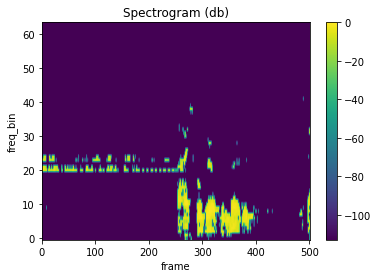

In [5]:
## Log-mel Spectrogram
logspec = 10.0 * spec.log10()
plot_spectrogram(logspec)

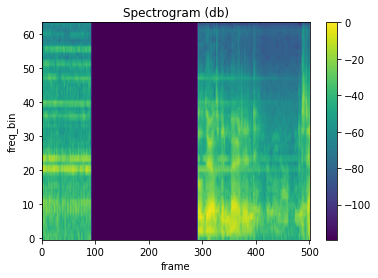

In [6]:
## Time Masking
tmasking = TimeMasking(200, audio_length)
tspec = tmasking(spec)
plot_spectrogram(tspec)

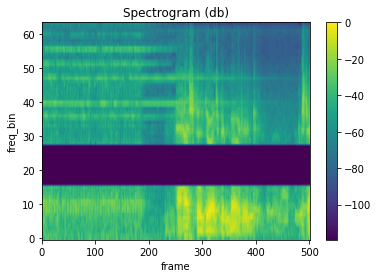

In [7]:
## Frequency Masking
fmasking = FrequencyMasking(24, n_mels)
fspec = fmasking(spec)
plot_spectrogram(fspec)

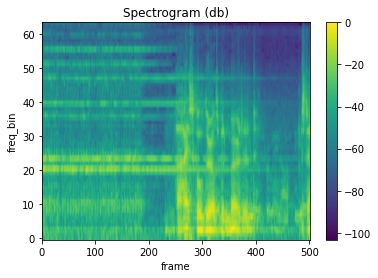

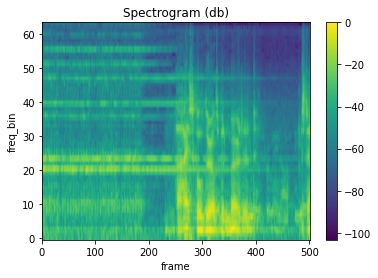

In [8]:
## Filter Augment
filteraug = FilterAugment((-20, 20), (5, 10))
filtspec = filteraug(spec)
plot_spectrogram(spec)
plot_spectrogram(filtspec)